# Исследование объявлений о продаже квартир
В вашем распоряжении данные сервиса Яндекс.  
Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах  
за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости.   
Ваша задача — установить параметры.   
Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.  
По каждой квартире на продажу доступны два вида данных.  
Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных.  
Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

### Описание данных

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)  
balcony — число балконов  
ceiling_height — высота потолков (м)  
cityCenters_nearest — расстояние до центра города (м)  
days_exposition — сколько дней было размещено объявление (от публикации до снятия)  
first_day_exposition — дата публикации  
floor — этаж  
floors_total — всего этажей в доме  
is_apartment — апартаменты (булев тип)  
kitchen_area — площадь кухни в квадратных метрах (м²)  
last_price — цена на момент снятия с публикации  
living_area — жилая площадь в квадратных метрах(м²)  
locality_name — название населённого пункта  
open_plan — свободная планировка (булев тип)  
parks_around3000 — число парков в радиусе 3 км  
parks_nearest — расстояние до ближайшего парка (м)  
ponds_around3000 — число водоёмов в радиусе 3 км  
ponds_nearest — расстояние до ближайшего водоёма (м)  
rooms — число комнат  
studio — квартира-студия (булев тип)  
total_area — площадь квартиры в квадратных метрах (м²)  
total_images — число фотографий квартиры в объявлении  



## Изучение данных из файла

In [1]:
import pandas as pd

try:
    
    df = pd.read_csv('/Users/andrejkleonskij/Downloads/real_estate_data.csv',sep = '\t')

except:
    

    df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
    
    
df.info()
df.head(5)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод
Открыли ДатаСет и вывели датафрейм, также вывели информацию с помощью метода info и describe
По информации видно, что датафрейм состоит из 21 столбца, в 14 из которызх есть пропущенные значения

### Шаг 2. Предобработка данных

In [2]:

df[df['ceiling_height'].isnull()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23687,6,3200000.0,39.0,2017-12-16T00:00:00,1,NaN,9.0,20.0,6,NaN,...,11.0,2.0,Санкт-Петербург,40837.0,16704.0,0.0,NaN,0.0,NaN,38.0
23690,3,5500000.0,52.0,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,...,6.0,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23692,2,1350000.0,30.0,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,...,6.0,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.0,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.5,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0


#В describe можно увидеть некоторые странные значения, такие как 0 комнат или 100 метровые потолки, менять данные не будем, оставим так как есть

In [3]:
df[df['living_area'].isnull()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.80,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,NaN,22.0,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,14,5950000.0,80.30,2018-07-03T00:00:00,3,2.70,12.0,NaN,5,NaN,...,NaN,NaN,Колпино,27933.0,33719.0,0.0,NaN,2.0,562.0,60.0
23663,12,6400000.0,88.00,2018-01-12T00:00:00,4,2.55,10.0,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.60,2018-02-08T00:00:00,1,2.80,9.0,NaN,2,NaN,...,NaN,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000.0,35.00,2017-12-08T00:00:00,1,NaN,9.0,NaN,4,NaN,...,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


Заменим пропуски в жилой площади, исходя из медианы жилой площади в разбивке по комнатам

In [4]:
group_rooms = df.groupby('rooms')['living_area'].median()

for i in group_rooms.index:

    df.loc[(df['rooms'] == i) & (df['living_area'].isnull()), 'living_area'] = group_rooms[i]


In [5]:
df[df.floors_total.isnull()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,NaN,NaN,17.60,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24T00:00:00,2,2.8,NaN,30.50,3,NaN,...,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02T00:00:00,2,NaN,NaN,31.70,20,NaN,...,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20T00:00:00,3,NaN,NaN,45.38,6,NaN,...,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25T00:00:00,3,NaN,NaN,50.40,18,NaN,...,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


Пропуски с количеством этажей заполнять не будем, хотя мы знаем на каком этаже находится квартира и значит этажей минимум столько же

In [6]:
df.is_apartment.value_counts()
df[df.is_apartment.isnull()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,45.0,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,30.5,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Пропуски с апартаментами тоже заполнять не будем, не достаточно информации

In [7]:
df[df.kitchen_area.isnull()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,45.0,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,NaN,9.0,17.6,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5.0,30.5,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,NaN,22.0,17.6,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300000.0,46.5,2017-03-06T00:00:00,1,NaN,13.0,17.6,13,NaN,...,NaN,NaN,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23655,1,2414306.0,40.5,2016-09-08T00:00:00,1,2.56,18.0,19.6,10,False,...,NaN,NaN,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,627.0
23663,12,6400000.0,88.0,2018-01-12T00:00:00,4,2.55,10.0,63.6,1,NaN,...,NaN,NaN,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.6,2018-02-08T00:00:00,1,2.80,9.0,17.6,2,NaN,...,NaN,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000.0,35.0,2017-12-08T00:00:00,1,NaN,9.0,17.6,4,NaN,...,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


Сделали медиану по группам также для kitchen area, остались пропуски где количество комнат 0

In [8]:
group_rooms1 = df.groupby('rooms')['kitchen_area'].median()


for i in group_rooms1.index:

    df.loc[(df['rooms'] == i) & (df['kitchen_area'].isnull()), 'kitchen_area'] = group_rooms1[i]



In [9]:
df[df.balcony.isnull()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
10,5,5050000.0,39.60,2017-11-16T00:00:00,1,2.67,12.0,20.30,3,NaN,...,8.50,NaN,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.50,4,NaN,...,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.30,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.00,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.70,1,NaN,...,8.80,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Заменим null на 1
df.loc[df['balcony'].isnull(),'balcony'] = 1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23502 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [12]:
# Для удобства сменим тип для балконов, цены на целый. И дату объявления типизуруем как datetime
df.balcony = df.balcony.astype('int')
df.last_price = df.last_price.astype('int')
df.first_day_exposition =  pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['days_exposition'] = df['days_exposition'].fillna(0).astype('int')

In [13]:
# Сгруппируем этажи по общему числу этаже, для пустых значений установим значение - 25, так как оно не сильно завышено но и не занижено
group_floor = df.groupby('floor')['floors_total'].median()

for i in group_rooms.index:

    df.loc[(df['floor'] == i) & (df['floors_total'].isnull()), 'floors_total'] = group_rooms[i]
df['floors_total'] = df['floors_total'].fillna(25)

Спасибо за подсказку, неправильно привык уже писать, нужно переучаться 

In [14]:
# сменим тип на целое для удобства
df.floors_total = df.floors_total.astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23502 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around3

**Вывод**  
Заменили пропуски и заменили типы для дальнейшего удобного исследования данных

## Расчёты и добавление результатов в таблицу

Посчитаем цену квадратного метра и округлим ее до целого для красоты:

In [15]:
df['price_m2'] = round(df.last_price/df.total_area).astype(int)
df.head(10)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,NaN,...,1,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0,120370
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,NaN,...,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,82921
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.30,4,NaN,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,92786
3,0,64900000,159.00,2015-07-24,3,NaN,14,45.00,9,NaN,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,408176
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,NaN,...,1,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.40,5,NaN,...,1,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55,95066
6,6,3700000,37.30,2017-11-02,1,NaN,26,10.60,6,NaN,...,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155,99196
7,5,7915000,71.60,2019-04-18,2,NaN,24,30.50,22,NaN,...,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,0,110545
8,20,2900000,33.16,2018-05-23,1,NaN,27,15.43,26,NaN,...,1,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189,87455
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,NaN,...,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289,88525


In [16]:
#Также посчитаем день недели, месяц и год размещения объявления

df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

In [17]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,weekday,month,year
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,NaN,...,16028.0,1.0,482.0,2.0,755.0,0,120370,3,3,2019
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.6,1,NaN,...,18603.0,0.0,NaN,0.0,NaN,81,82921,1,12,2018
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.3,4,NaN,...,13933.0,1.0,90.0,2.0,574.0,558,92786,3,8,2015
3,0,64900000,159.00,2015-07-24,3,NaN,14,45.0,9,NaN,...,6800.0,2.0,84.0,3.0,234.0,424,408176,4,7,2015
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,NaN,...,8098.0,2.0,112.0,1.0,48.0,121,100000,1,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.3,3,NaN,...,4232.0,1.0,796.0,3.0,381.0,0,72491,1,3,2017
23695,14,3100000,59.00,2018-01-15,3,NaN,5,38.0,4,NaN,...,NaN,NaN,NaN,NaN,NaN,45,52542,0,1,2018
23696,18,2500000,56.70,2018-02-11,2,NaN,3,29.7,1,NaN,...,NaN,NaN,NaN,NaN,NaN,0,44092,6,2,2018
23697,13,11475000,76.75,2017-03-28,2,3.00,17,30.5,12,NaN,...,10364.0,2.0,173.0,3.0,196.0,602,149511,1,3,2017


In [18]:
# Используем функцию строки для категоризации этажа
def floor_1(row):
    floor = row['floor']
    floors_total =row['floors_total']
    
    if floor == floors_total:
        return 'Последний'
    elif floor ==1:
         return  'Первый'
    else:
         return 'Другой'

df['floor_2'] = df.apply(floor_1, axis=1)
df.head()


        

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,weekday,month,year,floor_2
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,NaN,...,1.0,482.0,2.0,755.0,0,120370,3,3,2019,Другой
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.6,1,NaN,...,0.0,NaN,0.0,NaN,81,82921,1,12,2018,Первый
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.3,4,NaN,...,1.0,90.0,2.0,574.0,558,92786,3,8,2015,Другой
3,0,64900000,159.00,2015-07-24,3,NaN,14,45.0,9,NaN,...,2.0,84.0,3.0,234.0,424,408176,4,7,2015,Другой
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,NaN,...,2.0,112.0,1.0,48.0,121,100000,1,6,2018,Другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.3,3,NaN,...,1.0,796.0,3.0,381.0,0,72491,1,3,2017,Другой
23695,14,3100000,59.00,2018-01-15,3,NaN,5,38.0,4,NaN,...,NaN,NaN,NaN,NaN,45,52542,0,1,2018,Другой
23696,18,2500000,56.70,2018-02-11,2,NaN,3,29.7,1,NaN,...,NaN,NaN,NaN,NaN,0,44092,6,2,2018,Первый
23697,13,11475000,76.75,2017-03-28,2,3.00,17,30.5,12,NaN,...,2.0,173.0,3.0,196.0,602,149511,1,3,2017,Другой


In [19]:
# Находим отношение жилой площади и кухни к общей и округляем
df['living_ratio'] = round(df.living_area / df.total_area,2)
df['kitchen_ratio'] = round(df.kitchen_area/ df.living_area,2)


### Шаг 4. Исследовательский анализ данных

Text(0.5, 0, 'Area')

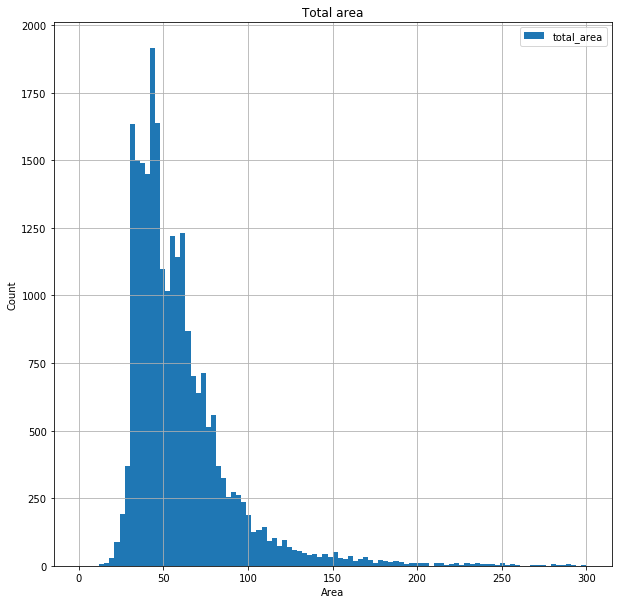

In [45]:
# Исследуем общую площадь
import matplotlib.pyplot as plt 
df.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (10,10), range = (0,300), title = 'Total area')
plt.ylabel('Count')
plt.xlabel('Area')


count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

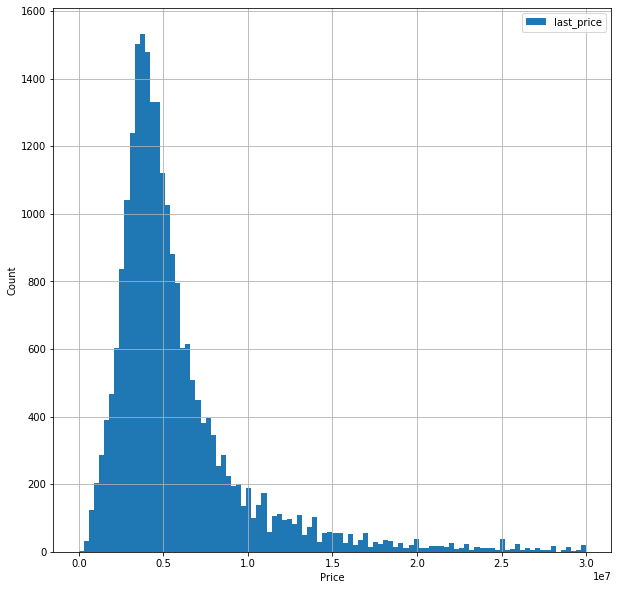

In [51]:
#Исследуем цену
df.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,30000000), figsize = (10,10))
plt.ylabel('Count')
plt.xlabel('Price')
df['last_price'].describe()


count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

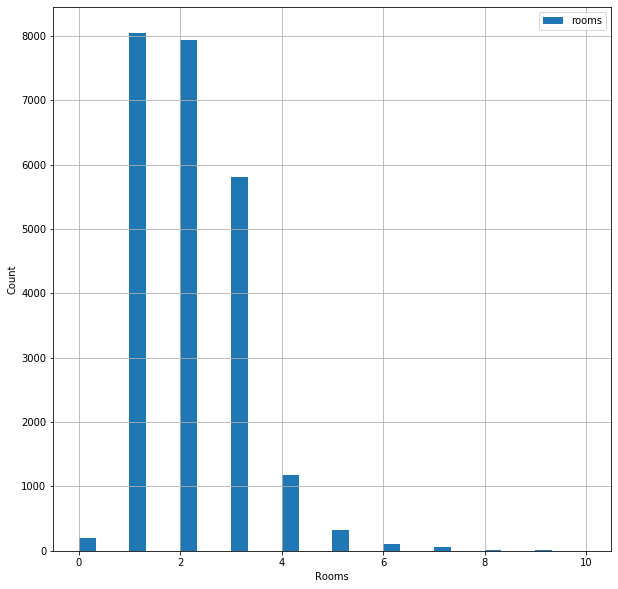

In [54]:
#Исследуем количество комнат
df.plot(y = 'rooms', kind = 'hist', bins = 30, grid=True, figsize = (10,10), range = (0,10))
plt.ylabel('Count')
plt.xlabel('Rooms')
df['rooms'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

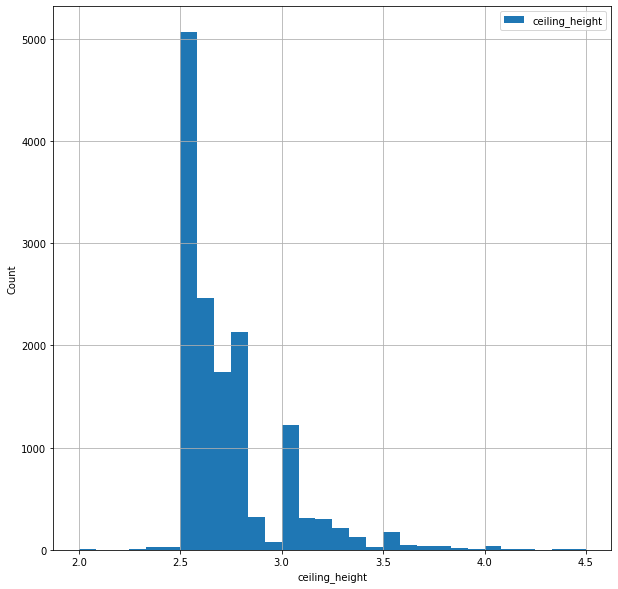

In [58]:
#Исследуем высоту потолков
df.plot(y = 'ceiling_height', kind = 'hist', bins = 30, range = (2,4.5), grid=True, figsize = (10,10))
plt.ylabel('Count')
plt.xlabel('ceiling_height')
df['ceiling_height'].describe()

**Вывод:** 
 1) Общая площадь варируется от 12 метров до 900 квадратов, наиболее часто встречаются квартиры со средней площадью около 60 метров квадратных и медианой 52.  
 2) Цены на недвижимость имеют среднее значение в 6,5 млн руб., медиана 4,6 млн руб.  
 3) Наиболеее представлены на рынке однокомнатные квартиры, но число комнат в некоторых квартирах достигает 19  
 4) Высота потолков в среднем достигает 2,65м но как мы уже заметили присутствуют неадекватные значения в виде 100 метровых потолков, также как и 0 комнат или цена квартиры в 12 тыс рублей)   
 По этим пунктам очевидно, что наиболее чаще на рынке встречаются однокомнатные квартиры в районе 5 млн руб с площадью около 55 кв метров

Постарался немного подработать графики, надеюсь так стало лучше😀

count    23699.000000
mean       156.608844
std        213.546873
min          0.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

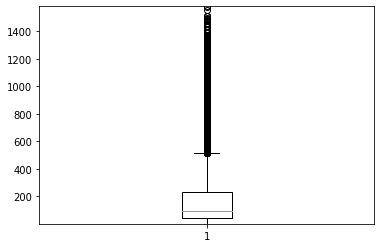

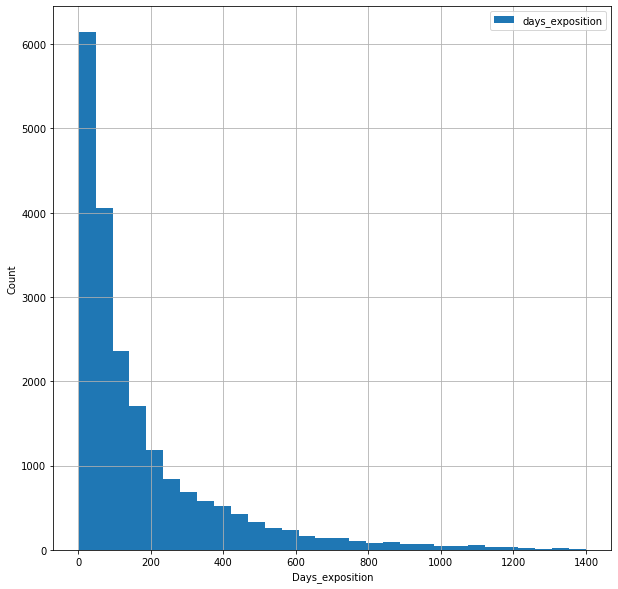

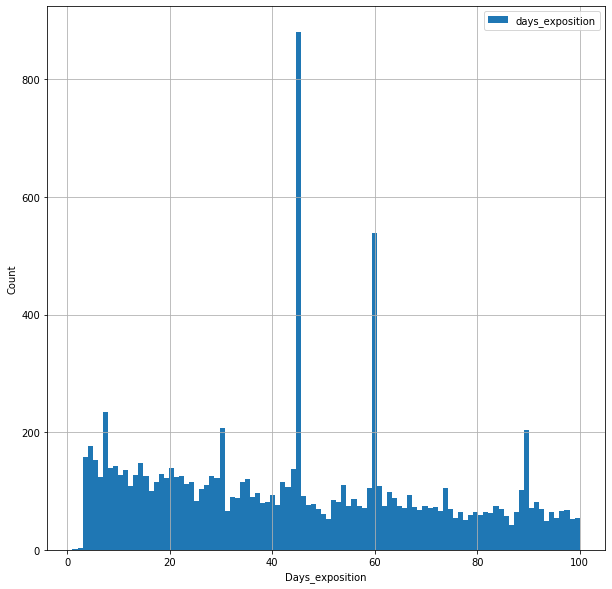

In [75]:
#диаграмма размаха
import matplotlib.pyplot as plt
plt.boxplot(df[df['days_exposition']!=0]['days_exposition'])
plt.ylim(1,1580)

df.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1400), figsize = (10,10))
plt.ylabel('Count')
plt.xlabel('Days_exposition')
df.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,100),figsize = (10,10))
plt.ylabel('Count')
plt.xlabel('Days_exposition')

#среднее значение, медиана и межквартильный размах
df[df['days_exposition']!=0]['days_exposition'].describe()
#data[data['days_exposition']!=0]['days_exposition'].value_counts()
df['days_exposition'].value_counts()
df['days_exposition'].describe()

**Вывод**

По гистограмме мы видим распределение Пуассона:среднее - 180, медиана - 95 дней.  
По второй гистограмме мы видим выбивающиеся значения, с помощьюю метода value_counts понятно что это 7,30, 45, 60, 90 дней - наиболее популярное количество дней для снятия объявления


count    18454.000000
mean       195.803349
std        226.760010
min          1.000000
25%         44.000000
50%        114.000000
75%        259.000000
max       1580.000000
Name: days_exposition, dtype: float64

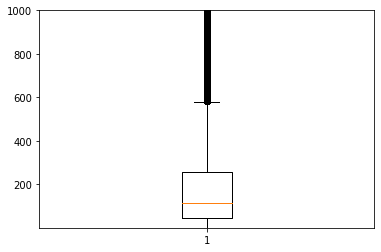

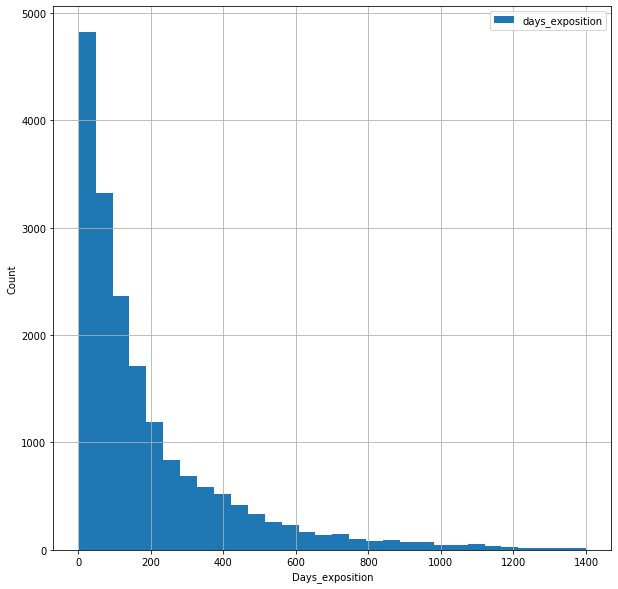

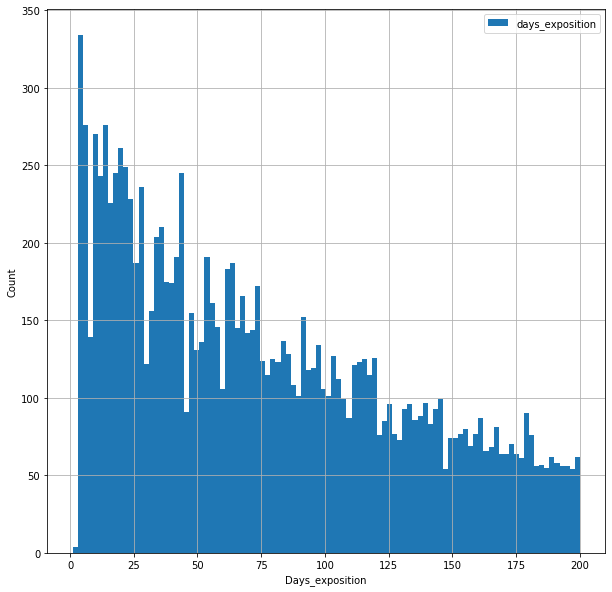

In [80]:
good_data = df.query('days_exposition != 7 and days_exposition != 30 and days_exposition != 45 and days_exposition != 60 and days_exposition != 90 and days_exposition != 0')
#Построим диаграмму размаха 
plt.boxplot(good_data['days_exposition'])
plt.ylim(1,1000)
#гистограммы
good_data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1400), figsize = (10,10))
plt.ylabel('Count')
plt.xlabel('Days_exposition')
good_data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200), figsize = (10,10))
plt.ylabel('Count')
plt.xlabel('Days_exposition')
good_data['days_exposition'].describe()


Построили диаграмму размаха, а также гистограммы, по которым можно сделать следующие выводы:

1) В очищенных данных медиана и среднее увеличились, 114 и 195 соответственно против 74 и 156 ранее  
2) Межквартальный размах увеличился с 500 до 600 дней

In [81]:
print(df['last_price'].corr(df['rooms']))

0.36334284996489546


Коэф Пирсона 0.3 - зависимость слабая, чем больше комнат тем больше стоимость

,mean,count,median
floor_2,,,
Другой,103486.737590,17446,98295.5
Первый,82296.087137,2892,81302.5
Последний,93056.797382,3361,87552.0


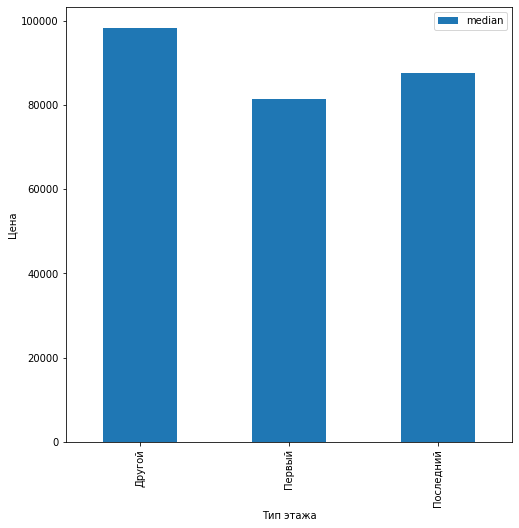

In [91]:
pivot_table_2 = df.query('floor_2 != "другой"').pivot_table(index = 'floor_2', values = 'price_m2', aggfunc = ['mean', 'count', 'median'])
pivot_table_2.columns = ['mean', 'count', 'median']
pivot_table_2.plot(y = 'median',kind = 'bar', figsize = (8,8))
plt.xlabel('Тип этажа')
plt.ylabel('Цена')
pivot_table_2

По графику видно, что квартиры на первом этаже существенно дешевле чем на последнем и тем более других этажах

In [117]:
df['cityCenters_nearest'].corr(df['last_price'])

-0.20674734874298376

Чем ближе к центру - тем выше цена, что впрочем, логично

,mean,count,median
weekday,,,
1,6.394233e+06,4183,4730000
2,6.627970e+06,3974,4700000
0,6.511613e+06,3612,4650000
3,6.708663e+06,4295,4650000
4,6.372131e+06,4000,4585000
5,6.976804e+06,1936,4555000
6,6.246180e+06,1699,4550000


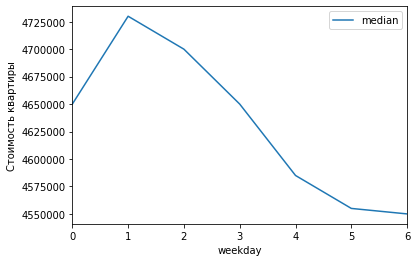

In [119]:
pivot_table_weekday = df.pivot_table(index = 'weekday', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday.columns = ['mean', 'count', 'median']
pivot_table_weekday.plot(y = 'median')
plt.ylabel('Стоимость квартиры')
pivot_table_weekday.sort_values('median', ascending = False)

Видим, что наиболее дорогая стоимость жилья бывает по вторникам а в субботу цены минимальные.  
Это возможно потому что выходные и меньше занимаются продажами квартир.

Да, невнимательно сделал 😞

,mean,count,median
month,,,
4,6.737198e+06,2379,4800000
9,6.825470e+06,1981,4700000
11,6.461363e+06,2371,4700000
12,7.011731e+06,1641,4700000
2,6.468500e+06,2640,4650000
3,6.359275e+06,2587,4650000
7,6.649337e+06,1695,4650000
1,6.668233e+06,1500,4600000
8,6.350233e+06,1744,4570000


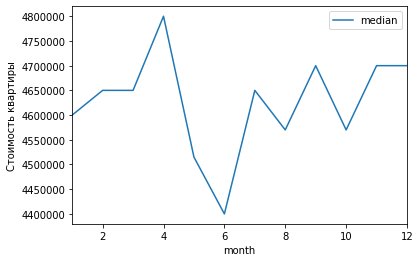

In [121]:
pivot_table_month = df.pivot_table(index = 'month', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_month.columns = ['mean', 'count', 'median']
pivot_table_month.plot(y = 'median')
plt.ylabel('Стоимость квартиры')
pivot_table_month.sort_values('median', ascending = False)

**Вывод**  

Cамая высокая стоимость квартиры - июль и апрель, самая низкая - май и июнь

,mean,count,median
year,,,
2014,1.208714e+07,137,7700000
2015,8.572833e+06,1191,5350000
2019,6.782388e+06,2879,5050000
2016,6.827912e+06,2783,4550000
2018,5.950966e+06,8519,4550000
2017,6.585729e+06,8190,4500000


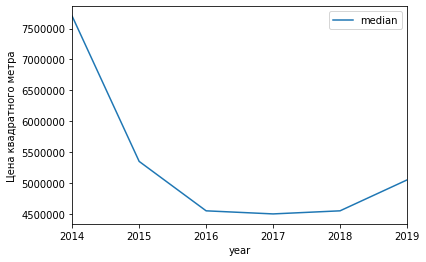

In [122]:
pivot_table_year = df.pivot_table(index = 'year', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_year.columns = ['mean', 'count', 'median']
pivot_table_year.plot(y = 'median')
plt.ylabel('Цена квадратного метра')
pivot_table_year.sort_values('median', ascending = False)

**Вывод**  

Очевидно что с 2017 года идет рост цены квартиры (медианный) на рынке недвижимости в среднем,  
интересно было бы посмотреть статистику за 20-21 год, когда цены стали еще выше)

In [101]:
df[['last_price','cityCenters_nearest']]

,last_price,cityCenters_nearest
0,13000000,16028.0
1,3350000,18603.0
2,5196000,13933.0
3,64900000,6800.0
4,10000000,8098.0
...,...,...
23694,9700000,4232.0
23695,3100000,NaN
23696,2500000,NaN
23697,11475000,10364.0


In [102]:
df.groupby('locality_name')['last_price'].count().sort_values(ascending=False).head(10)

df.pivot_table(index ='locality_name', values='price_m2', aggfunc=['count', 'mean']).sort_values([('count', 'price_m2')], ascending = False).head(10)


,count,mean
,price_m2,price_m2
locality_name,,
Санкт-Петербург,15721,114849.005788
посёлок Мурино,522,85752.181992
посёлок Шушары,440,78677.379545
Всеволожск,398,68654.474874
Пушкин,369,103125.818428
Колпино,338,75424.571006
посёлок Парголово,327,90175.886850
Гатчина,307,68746.110749


**Вывод**  
Cамая высокая стоимость квадратного метра из 10 населённых пунктов с самым большим количеством объявлений в Санкт-Петербурге, тогда как самая низкая стоимость в Выборге.

,price_m2
cityCenters_nearest_km,
0,187324.151163
1,166603.741667
2,146662.820847
3,129416.336502
4,137475.502756
5,146979.224967
6,152277.895745
7,141399.724816
8,120581.335821


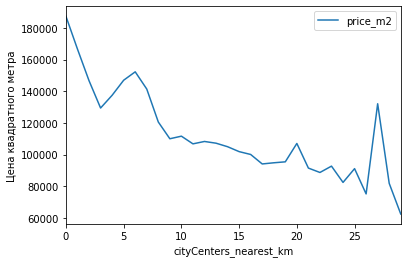

In [104]:

df['cityCenters_nearest_km'] = df['cityCenters_nearest']/1000
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].fillna(1000000)
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].astype('int')
pivot_table_km = df.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km !=1000000').pivot_table(index = 'cityCenters_nearest_km', values = 'price_m2', aggfunc = 'mean')
pivot_table_km.plot()
plt.ylabel('Цена квадратного метра')
pivot_table_km

**Вывод**  
Радиус центра города явно меньше 7 км, исходя из графика!

In [105]:
segment_kv = df.query('cityCenters_nearest_km <= 7 and locality_name == "Санкт-Петербург"')

0.006246789098600452

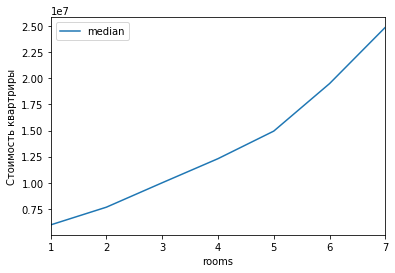

In [124]:
segment_kv_rooms = segment_kv.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
segment_kv_rooms

segment_kv_rooms.columns = ['mean', 'count', 'median']
segment_kv_rooms.query('count > 50').plot(y = 'median')
plt.ylabel('Стоимость квартриры')
segment_kv['rooms'].corr(segment_kv['price_m2'])

Коэффициент корреляции показывает отсутствие взаимосвязи между количеством комнат и ценой квартиры

,mean,count,median
floor_2,,,
Другой,1.457907e+07,2653,9500000
Первый,9.167233e+06,407,6550000
Последний,1.881441e+07,652,9175000


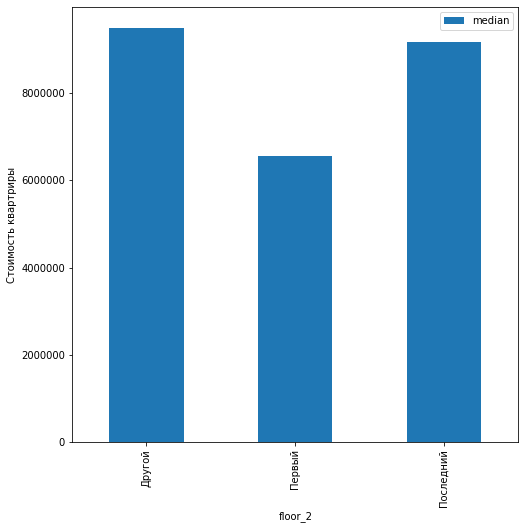

In [126]:
segment_kv_floor_2 = segment_kv.pivot_table(index = 'floor_2', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
segment_kv_floor_2.columns = ['mean', 'count', 'median']
segment_kv_floor_2.plot(y = 'median', kind = 'bar', figsize = (8,8))
plt.ylabel('Стоимость квартриры')
segment_kv_floor_2

**Вывод**  
Как и в обычной выборке квартира на первом этаже стоит дешевле чем на последнем

In [127]:
segment_kv['cityCenters_nearest'].corr(segment_kv['last_price'])

-0.048304000474881544

**Вывод**  
Зависимости не наблюдается

,mean,count,median
weekday,,,
0,1.444047e+07,560,9325000
3,1.434801e+07,763,9250000
6,1.503329e+07,210,9200000
2,1.475535e+07,637,9190000
1,1.394717e+07,631,9000000
4,1.423913e+07,629,8990000
5,1.889688e+07,282,8525000


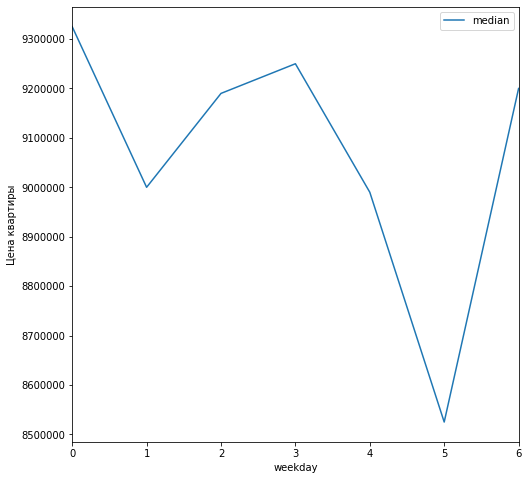

In [129]:
segment_kv_weekday = segment_kv.pivot_table(index = 'weekday', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
segment_kv_weekday.columns = ['mean', 'count', 'median']
segment_kv_weekday.plot(y = 'median', figsize = (8,8))
plt.ylabel('Цена квартиры')

segment_kv_weekday.sort_values('median', ascending = False)

,mean,count,median
month,,,
1,1.574588e+07,226,9900000
2,1.482058e+07,406,9500000
3,1.443425e+07,395,9400000
9,1.544356e+07,323,9400000
11,1.383857e+07,373,9300000
7,1.486899e+07,288,9040000
8,1.363078e+07,273,8900000
4,1.588917e+07,350,8875000
5,1.439314e+07,208,8825000


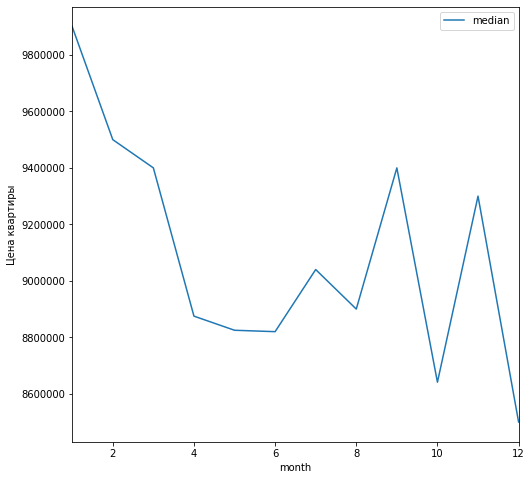

In [131]:
segment_kv_month = segment_kv.pivot_table(index = 'month', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
segment_kv_month.columns = ['mean', 'count', 'median']
segment_kv_month.plot(y = 'median', figsize = (8,8))
plt.ylabel('Цена квартиры')
segment_kv_month.sort_values('median', ascending = False)


**Вывод:**   
Не похоже на обычную выборку: январь и сентябрь - максимум, октябрь и декабрь - минимум


,mean,count,median
year,,,
2015,1.688356e+07,328,9995000
2019,1.521953e+07,401,9476000
2016,1.531084e+07,522,9400000
2017,1.527439e+07,1331,8990000
2018,1.271018e+07,1103,8750000


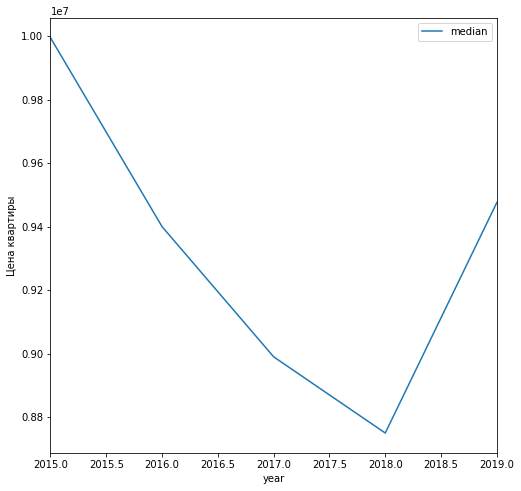

In [132]:
segment_kv_year = segment_kv.pivot_table(index = 'year', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
segment_kv_year.columns = ['mean', 'count', 'median']
segment_kv_year.query('count > 50').plot(y = 'median', figsize = (8,8))
plt.ylabel('Цена квартиры')
segment_kv_year.query('count > 50').sort_values('median', ascending = False)

**Вывод** 
В отличие от общей выборки цены до 2018 года постоянно падают

### Шаг 5. Общий вывод

1) обработка пропусков  
2) изменение типов  
3) добавили новые признаки  
4) Выявили аномальные значения в высоте потолков, количестве комнат, днях размещения объявлений  
5) Посмотрели корреляцию между параметрами и выяснили что наиболее влияние на цену имеют близость к центру и количество комнат  
6) Также мы сравнили сегмент в центре города с общей выборкой и выявили некоторые отличия  
            **- В обоих случаях квартиры на первом этаже стоит дешевле, чем на других  
            - В центральном сегменте  зависимость цены от расстояния до центра намного меньше чем в большой выборке( что впрочем логично, поскольку берем малый участок)  
            - Максимальная цена картиры  в центральном в сегменте наблюдается по вск, в общей выборке - по вторникам   
            - Выборки не схожи по  цене квартиры в разбивке по месяцам
            - В центральном сегменте до 2018 года  падали цены за жилье, в отличие от полной выборки, где цены падали до 2017**
